# Prophet Model for Time Series data

In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import numpy as np


In [2]:
data=pd.read_csv('SBI1619.csv')
#data.head()

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Date'])
df['y'] = data['Close Price']
df.sort_values(by=['ds'], inplace=True, ascending=True)
df.reset_index(drop=True,inplace=True)
#df.head()

In [4]:
train=df.iloc[:-10]
test=df.iloc[-10:]

In [5]:
m=Prophet(
        growth="linear",
        seasonality_mode="multiplicative",
        changepoint_prior_scale=30,
        seasonality_prior_scale=35)

In [6]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=10, freq='D')

In [8]:
forecast = m.predict(future)

In [9]:
pred=forecast[['ds','yhat']]

In [10]:
pred=df.merge(pred, how='inner', on='ds')

In [11]:
pred.set_index('ds',inplace=True)

<AxesSubplot:xlabel='ds'>

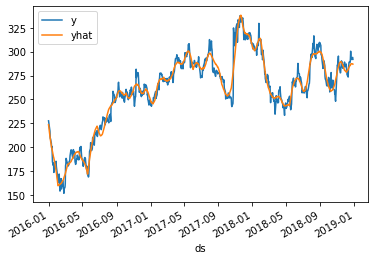

In [12]:
pred.plot()

In [31]:
def MAPE(pred,actual):
    return np.mean(np.abs((pred-actual)/actual))

In [50]:
print(f'The error is {round(MAPE(pred.yhat,pred.y), 5)}')

The error is 0.0212


#  Prophet with Sentimental Analysis

In [17]:
newsdf=pd.read_csv('news_df.csv')

In [22]:
newsdf.rename(columns={'date': 'ds'}, inplace=True)
newsdf['ds'] = pd.to_datetime(newsdf['ds'])

In [32]:
prophet_df = pd.merge(df, newsdf, how='inner', on=['ds'])

In [35]:
prophet_df

,ds,y,polarity,subjectivity
0,2016-01-01,227.65,0.093826,0.436984
1,2016-01-04,220.95,0.041845,0.423914
2,2016-01-05,218.25,0.057784,0.374786
3,2016-01-06,217.00,0.085804,0.407554
4,2016-01-07,209.55,0.086929,0.421813
...,...,...,...,...
737,2018-12-26,293.95,0.026659,0.396428
738,2018-12-27,291.85,0.019154,0.426399
739,2018-12-28,294.45,0.020108,0.388028
740,2018-12-31,295.65,0.054422,0.411850


In [34]:
prophet_df.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
train_m=prophet_df.iloc[:-10]
test_m=prophet_df.iloc[-10:]

In [39]:
fbp_m=Prophet(
        growth="linear",
        seasonality_mode="multiplicative",
        changepoint_prior_scale=30,
        seasonality_prior_scale=35)

In [40]:
fbp_m.add_regressor('polarity')
fbp_m.add_regressor('subjectivity')

fbp_m.fit(train_m)

fut_m = fbp_m.make_future_dataframe(periods=10) 
fut_m['polarity']=prophet_df['polarity'].copy()
fut_m['subjectivity']=prophet_df['subjectivity'].copy()
forecast_m = fbp_m.predict(fut_m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
pred_m=forecast_m[['ds','yhat']]

In [42]:
pred_m=prophet_df.merge(pred_m, how='inner', on='ds')

In [43]:
pred_m.set_index('ds',inplace=True)

In [44]:
pred_m

,y,polarity,subjectivity,yhat
ds,,,,
2016-01-01,227.65,0.093826,0.436984,224.136040
2016-01-04,220.95,0.041845,0.423914,214.732525
2016-01-05,218.25,0.057784,0.374786,212.943318
2016-01-06,217.00,0.085804,0.407554,212.034769
2016-01-07,209.55,0.086929,0.421813,209.872565
...,...,...,...,...
2018-12-20,293.85,0.014108,0.397354,286.194223
2018-12-21,291.65,0.071712,0.428034,288.088267
2018-12-24,292.80,0.099456,0.414238,285.792875


In [45]:
pred_m.drop(['polarity', 'subjectivity'], axis=1, inplace=True)

In [46]:
pred_m

,y,yhat
ds,,
2016-01-01,227.65,224.136040
2016-01-04,220.95,214.732525
2016-01-05,218.25,212.943318
2016-01-06,217.00,212.034769
2016-01-07,209.55,209.872565
...,...,...
2018-12-20,293.85,286.194223
2018-12-21,291.65,288.088267
2018-12-24,292.80,285.792875


<AxesSubplot:xlabel='ds'>

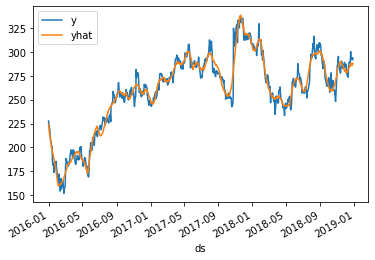

In [47]:
pred_m.plot()

In [49]:
print(f'The error is {round(MAPE(pred_m.yhat,pred_m.y), 5)}')

The error is 0.02118
